In [1]:
#pip install altair

In [32]:
from matplotlib import pyplot as plt
import numpy as np
import numpy.linalg as nla
import pandas as pd
import seaborn as sns
import altair as alt
import re
import pdb  # for Python debugger
import sys
import math
from os.path import join

In [3]:
choc_data = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/flavors_of_cacao.csv", sep=",", encoding='latin-1')

In [4]:
choc_data.columns = ['maker', 'specific_origin', 'reference_number', 'review_date', 'cocoa_percent', 'maker_location', 'rating', 'bean_type', 'broad_origin']

In [5]:
choc_data

,maker,specific_origin,reference_number,review_date,cocoa_percent,maker_location,rating,bean_type,broad_origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,NaN,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,NaN,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,NaN,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,NaN,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,NaN,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,NaN,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,NaN,India


In [6]:
choc_data['bean_type'] = choc_data['bean_type'].fillna('Blend')

In [7]:
choc_data['cocoa_percent'] = pd.to_numeric(choc_data['cocoa_percent'].str.strip('%'))

In [8]:
choc_data['maker_location'] = choc_data['maker_location']\
.str.replace('Amsterdam', 'Holland')\
.str.replace('U.K.', 'England')\
.str.replace('Niacragua', 'Nicaragua')\
.str.replace('Domincan Republic', 'Dominican Republic')\
.str.replace('Holland', 'Netherlands')

In [9]:
def cleanup_spelling_abbrev(text):
    replacements = [
        ['-', ', '], ['/ ', ', '], ['/', ', '], ['\(', ', '], [' and', ', '], [' &', ', '], ['\)', ''],
        ['Dom Rep|DR|Domin Rep|Dominican Rep,|Domincan Republic', 'Dominican Republic'],
        ['Mad,|Mad$', 'Madagascar, '],
        ['PNG', 'Papua New Guinea, '],
        ['Guat,|Guat$', 'Guatemala, '],
        ['Ven,|Ven$|Venez,|Venez$', 'Venezuela, '],
        ['Ecu,|Ecu$|Ecuad,|Ecuad$', 'Ecuador, '],
        ['Nic,|Nic$', 'Nicaragua, '],
        ['Cost Rica', 'Costa Rica'],
        ['Mex,|Mex$', 'Mexico, '],
        ['Jam,|Jam$', 'Jamaica, '],
        ['Haw,|Haw$', 'Hawaii, '],
        ['Gre,|Gre$', 'Grenada, '],
        ['Tri,|Tri$', 'Trinidad, '],
        ['C Am', 'Central America'],
        ['S America', 'South America'],
        [', $', ''], [',  ', ', '], [', ,', ', '], ['\xa0', ' '],[',\s+', ','],
        [' Bali', ',Bali']
    ]
    for i, j in replacements:
        text = re.sub(i, j, text)
    return text

In [10]:
choc_data['specific_origin'] = choc_data['specific_origin'].str.replace('.', '').apply(cleanup_spelling_abbrev)
choc_data['broad_origin'] = choc_data['broad_origin'].fillna(choc_data['specific_origin'])
choc_data['broad_origin'] = choc_data['broad_origin'].str.replace('.', '').apply(cleanup_spelling_abbrev)
choc_data.loc[choc_data['bean_type'].isin(['Trinitario, Criollo']),'bean_type'] = "Criollo, Trinitario"
choc_data.loc[choc_data['maker']=='Shattel','maker'] = 'Shattell'
choc_data['maker'] = choc_data['maker'].str.replace(u'Na\xef\xbf\xbdve','Naive')

In [11]:
original_cols = choc_data.columns.values
choc_data.head()

,maker,specific_origin,reference_number,review_date,cocoa_percent,maker_location,rating,bean_type,broad_origin
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,Blend,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,Blend,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,Blend,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,Blend,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,Blend,Peru


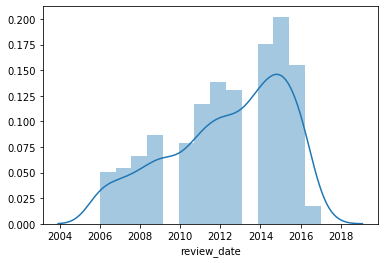

In [12]:
sns.distplot(choc_data['review_date'])

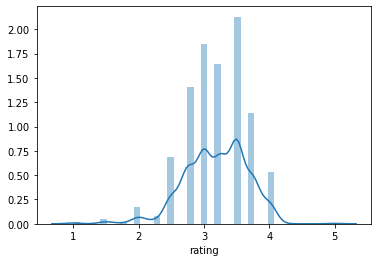

In [13]:
sns.distplot(choc_data['rating'])

In [14]:
choc_data['rating_norm'] = (choc_data['rating'] - choc_data['rating'].mean()
                           ) / choc_data['rating'].std()

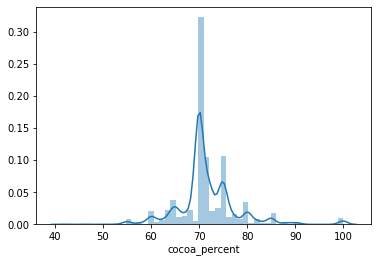

In [15]:
sns.distplot(choc_data['cocoa_percent'])

In [16]:
choc_data['cocoa_percent_norm'] = (
    choc_data['cocoa_percent'] -
    choc_data['cocoa_percent'].mean()) / choc_data['cocoa_percent'].std()

In [17]:
choc_data.head()

,maker,specific_origin,reference_number,review_date,cocoa_percent,maker_location,rating,bean_type,broad_origin,rating_norm,cocoa_percent_norm
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,Blend,Sao Tome,1.179902,-1.375639
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,Blend,Togo,-0.911875,-0.268590
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,Blend,Togo,-0.388931,-0.268590
3,A. Morin,Akata,1680,2015,70.0,France,3.50,Blend,Togo,0.656958,-0.268590
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,Blend,Peru,0.656958,-0.268590


In [18]:
countries_info = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/countries_lat_long.csv", sep=",", encoding='latin-1')

In [19]:
choc_data = pd.merge(
    choc_data, countries_info, left_on="maker_location", right_on="name")
choc_data.rename(
    columns={
        "longitude": "maker_long",
        "latitude": "maker_lat"
    }, inplace=True)
choc_data.drop(
    columns=["name", "country"], inplace=True)

In [20]:
choc_data = pd.merge(
    choc_data, countries_info, left_on="broad_origin", right_on="name")
choc_data.rename(
    columns={
        "longitude": "origin_long",
        "latitude": "origin_lat"
    },
    inplace=True)
choc_data.drop(
    columns=["name", "country"], inplace=True)  # don't need this data

choc_data.head()

,maker,specific_origin,reference_number,review_date,cocoa_percent,maker_location,rating,bean_type,broad_origin,rating_norm,cocoa_percent_norm,maker_lat,maker_long,origin_lat,origin_long
0,A. Morin,Kpime,1676,2015,70.0,France,2.75,Blend,Togo,-0.911875,-0.26859,46.227638,2.213749,8.619543,0.824782
1,A. Morin,Atsane,1676,2015,70.0,France,3.00,Blend,Togo,-0.388931,-0.26859,46.227638,2.213749,8.619543,0.824782
2,A. Morin,Akata,1680,2015,70.0,France,3.50,Blend,Togo,0.656958,-0.26859,46.227638,2.213749,8.619543,0.824782
3,A. Morin,Quilla,1704,2015,70.0,France,3.50,Blend,Peru,0.656958,-0.26859,46.227638,2.213749,-9.189967,-75.015152
4,A. Morin,Pablino,1319,2014,70.0,France,4.00,Blend,Peru,1.702846,-0.26859,46.227638,2.213749,-9.189967,-75.015152


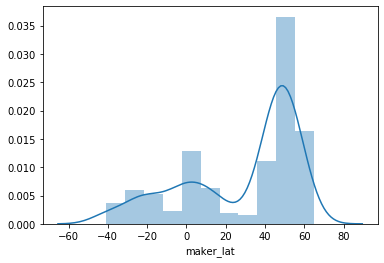

In [21]:
sns.distplot(choc_data['maker_lat'])

In [22]:
numQuantiles = 20
colsQuantiles = ['maker_lat', 'maker_long', 'origin_lat', 'origin_long']

def createQuantiles(dfColumn, numQuantiles):
  return pd.qcut(dfColumn, numQuantiles, labels=False, duplicates='drop')


for string in colsQuantiles:
  choc_data[string] = createQuantiles(choc_data[string], numQuantiles)
  
choc_data.tail()

,maker,specific_origin,reference_number,review_date,cocoa_percent,maker_location,rating,bean_type,broad_origin,rating_norm,cocoa_percent_norm,maker_lat,maker_long,origin_lat,origin_long
782,Mesocacao,Honduras,1347,2014,70.0,Honduras,3.50,Blend,Honduras,0.656958,-0.268590,6,0,10,1
783,Malagos,"Davao,Mt Talamo foothills",1121,2013,65.0,Philippines,3.50,Trinitario,Philippines,0.656958,-1.059339,6,13,10,12
784,Mesocacao,El Salvador,1494,2015,80.0,Honduras,2.75,Blend,El Salvador,-0.911875,1.312908,6,0,10,0
785,Mesocacao,El Salvador,1494,2015,70.0,Honduras,3.00,Blend,El Salvador,-0.388931,-0.268590,6,0,10,0
786,Tan Ban Skrati,"Paramaribo,batch 20160043,01",1868,2016,70.0,Suriname,3.25,Trinitario,Suriname,0.134014,-0.268590,4,4,7,8


In [23]:
def minMaxScaler(numArr):
  minx = np.min(numArr)
  maxx = np.max(numArr)
  numArr = (numArr - minx) / (maxx - minx)
  return numArr


for string in colsQuantiles:
  choc_data[string] = minMaxScaler(choc_data[string])

In [24]:
# duplicate the "maker" feature since it's removed by one-hot encoding function
choc_data['maker2'] = choc_data['maker']
choc_data = pd.get_dummies(choc_data, columns=['maker2'], prefix=['maker'])
# similarly, duplicate the "bean_type" feature
choc_data['bean_type2'] = choc_data['bean_type']
choc_data = pd.get_dummies(choc_data, columns=['bean_type2'], prefix=['bean'])

In [25]:
# Split dataframe into two frames: Original data and data for clustering
choc_data_backup = choc_data.loc[:, original_cols].copy(deep=True)
choc_data.drop(columns=original_cols, inplace=True)

# get_dummies returned ints for one-hot encoding but we want floats so divide by
# 1.0
# Note: In the latest version of "get_dummies", you can set "dtype" to float
choc_data = choc_data / 1.0

In [27]:
def getSimilarity(obj1, obj2):
  len1 = len(obj1.index)
  len2 = len(obj2.index)
  if not (len1 == len2):
    print("Error: Compared objects must have same number of features.")
    sys.exit()
    return 0
  else:
    similarity = obj1 - obj2
    similarity = np.sum((similarity**2.0) / 10.0)
    similarity = 1 - math.sqrt(similarity)
    return similarity

In [33]:
choc1 = 0  #@param
chocsToCompare = [1, 4]  #@param

print("Similarity between chocolates " + str(choc1) + " and ...")

for ii in range(chocsToCompare[0], chocsToCompare[1] + 1):
  print(str(ii) + ": " + str(
      getSimilarity(choc_data.loc[choc1], choc_data.loc[ii])))

print("\n\nFeature data for chocolate " + str(choc1))
print(choc_data_backup.loc[choc1:choc1, :])
print("\n\nFeature data for compared chocolates " + str(chocsToCompare))
print(choc_data_backup.loc[chocsToCompare[0]:chocsToCompare[1], :])

Similarity between chocolates 0 and ...
1: 0.8346304947537486
2: 0.5038914842612459
3: 0.4555557720237311
4: 0.14327793910573605


Feature data for chocolate 0
      maker specific_origin  reference_number  review_date  cocoa_percent  \
0  A. Morin           Kpime              1676         2015           70.0   

  maker_location  rating bean_type broad_origin  
0         France    2.75     Blend         Togo  


Feature data for compared chocolates [1, 4]
      maker specific_origin  reference_number  review_date  cocoa_percent  \
1  A. Morin          Atsane              1676         2015           70.0   
2  A. Morin           Akata              1680         2015           70.0   
3  A. Morin          Quilla              1704         2015           70.0   
4  A. Morin         Pablino              1319         2014           70.0   

  maker_location  rating bean_type broad_origin  
1         France     3.0     Blend         Togo  
2         France     3.5     Blend         Togo  
3  

In [35]:
#@title Run cell to setup functions
def dfSimilarity(df, centroids):
  ### dfSimilarity = Calculate similarities for dataframe input
  ### We need to calculate ||a-b||^2 = |a|^2 + |b|^2 - 2*|a|*|b|
  ### Implement this with matrix operations
  ### See the Appendix for further explanation
  numPoints = len(df.index)
  numCentroids = len(centroids.index)
  ## Strictly speaking, we don't need to calculate the norm of points
  # because it adds a constant bias to distances
  # But calculating it so that the similarity doesn't go negative
  # And that we expect similarities in [0,1] which aids debugging
  pointNorms = np.square(nla.norm(df, axis=1))
  pointNorms = np.reshape(pointNorms, [numPoints, 1])
  ## Calculate the norm of centroids
  centroidNorms = np.square(nla.norm(centroids, axis=1))
  centroidNorms = np.reshape(centroidNorms, (1, numCentroids))
  ## Calculate |a|^2 + |b|^2 - 2*|a|*|b|
  similarities = pointNorms + centroidNorms - 2.0 * np.dot(
      df, np.transpose(centroids))
  # Divide by the number of features
  # Which is 10 because the one-hot encoding means the "Maker" and "Bean" are
  # weighted twice
  similarities = similarities / 10.0
  # numerical artifacts lead to negligible but negative values that go to NaN on the root
  similarities = similarities.clip(min=0.0)
  # Square root since it's ||a-b||^2
  similarities = np.sqrt(similarities)
  return similarities


def initCentroids(df, k, feature_cols):
  # Pick 'k' examples are random to serve as initial centroids
  limit = len(df.index)
  centroids_key = np.random.randint(0, limit - 1, k)
  centroids = df.loc[centroids_key, feature_cols].copy(deep=True)
  # the indexes get copied over so reset them
  centroids.reset_index(drop=True, inplace=True)
  return centroids


def pt2centroid(df, centroids, feature_cols):
  ### Calculate similarities between all points and centroids
  ### And assign points to the closest centroid + save that distance
  numCentroids = len(centroids.index)
  numExamples = len(df.index)
  # dfSimilarity = Calculate similarities for dataframe input
  dist = dfSimilarity(df.loc[:, feature_cols], centroids.loc[:, feature_cols])
  df.loc[:, 'centroid'] = np.argmin(dist, axis=1)  # closest centroid
  df.loc[:, 'pt2centroid'] = np.min(dist, axis=1)  # minimum distance
  return df


def recomputeCentroids(df, centroids, feature_cols):
  ### For every centroid, recompute it as an average of the points
  ### assigned to it
  numCentroids = len(centroids.index)
  for cen in range(numCentroids):
    dfSubset = df.loc[df['centroid'] == cen,
                      feature_cols]  # all points for centroid
    if not (dfSubset.empty):  # if there are points assigned to the centroid
      clusterAvg = np.sum(dfSubset) / len(dfSubset.index)
      centroids.loc[cen] = clusterAvg
  return centroids


def kmeans(df, k, feature_cols, verbose):
  flagConvergence = False
  maxIter = 100
  iter = 0  # ensure kmeans doesn't run for ever
  centroids = initCentroids(df, k, feature_cols)
  while not (flagConvergence):
    iter += 1
    #Save old mapping of points to centroids
    oldMapping = df['centroid'].copy(deep=True)
    # Perform k-means
    df = pt2centroid(df, centroids, feature_cols)
    centroids = recomputeCentroids(df, centroids, feature_cols)
    # Check convergence by comparing [oldMapping, newMapping]
    newMapping = df['centroid']
    flagConvergence = all(oldMapping == newMapping)
    if verbose == 1:
      print('Total distance:' + str(np.sum(df['pt2centroid'])))
    if (iter > maxIter):
      print('k-means did not converge! Reached maximum iteration limit of ' \
            + str(maxIter) + '.')
      sys.exit()
      return
  print('k-means converged for ' + str(k) + ' clusters' + \
        ' after ' + str(iter) + ' iterations!')
  return [df, centroids]

In [36]:
k = 30  #@param

feature_cols = choc_data.columns.values  # save original columns
# initialize every point to an impossible value, the k+1 cluster
choc_data['centroid'] = k
# init the point to centroid distance to an impossible value "2" (>1)
choc_data['pt2centroid'] = 2
[choc_data, centroids] = kmeans(choc_data, k, feature_cols, 1)
print("Data for the first few chocolates, with 'centroid' and 'pt2centroid' on"
      ' the extreme right:')
choc_data.head()

Total distance:424.54309709938263
Total distance:335.90647254841434
Total distance:330.33604485456306
Total distance:328.87599436621633
Total distance:327.55660098630403
Total distance:326.5964530168758
Total distance:325.5915310639568
Total distance:324.7209828110855
Total distance:324.4621780279554
Total distance:324.30012579452324
Total distance:324.1906887384159
Total distance:324.20920510974895
Total distance:324.1874411204242
Total distance:324.07125511878826
Total distance:324.0112790139182
Total distance:323.9582929816441
Total distance:323.9536378801833
k-means converged for 30 clusters after 17 iterations!
Data for the first few chocolates, with 'centroid' and 'pt2centroid' on the extreme right:


,rating_norm,cocoa_percent_norm,maker_lat,maker_long,origin_lat,origin_long,maker_A. Morin,maker_AMMA,maker_Adi,maker_Aequare (Gianduja),...,bean_Forastero (Nacional),bean_Forastero (Parazinho),bean_Nacional,bean_Nacional (Arriba),bean_Trinitario,bean_Trinitario (85% Criollo),bean_Trinitario (Scavina),"bean_Trinitario, TCGA",centroid,pt2centroid
0,-0.911875,-0.26859,0.6,0.4,0.615385,0.769231,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14,0.336302
1,-0.388931,-0.26859,0.6,0.4,0.615385,0.769231,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14,0.351504
2,0.656958,-0.26859,0.6,0.4,0.615385,0.769231,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20,0.340725
3,0.656958,-0.26859,0.6,0.4,0.153846,0.230769,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20,0.323966
4,1.702846,-0.26859,0.6,0.4,0.153846,0.230769,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0.385989


In [37]:
clusterNumber = 7  #@param
choc_data_backup.loc[choc_data['centroid'] == clusterNumber, :]

,maker,specific_origin,reference_number,review_date,cocoa_percent,maker_location,rating,bean_type,broad_origin
55,La Chocolaterie Nanairo,"Lumas,2015 Harvest,Batch 6,brown sugar",1892,2016,70.0,Japan,2.25,"Criollo, Trinitario",Peru
56,La Chocolaterie Nanairo,"Lumas,2015 Harvest,Batch 7",1892,2016,70.0,Japan,2.50,"Criollo, Trinitario",Peru
62,Summerbird,Peru,1800,2016,71.0,Denmark,3.00,"Criollo, Trinitario",Peru
67,Zotter,"Satipo Pangoa region,16hr conche",875,2012,70.0,Austria,3.00,Criollo (Amarru),Peru
164,Coppeneur,"Porcelana,Venezuela",220,2008,72.0,Germany,3.00,Criollo (Porcelana),Venezuela
450,Silvio Bessone,"Porcelana,Colombia,Amazonas",741,2011,68.0,Italy,3.00,"Criollo, Trinitario",Colombia
501,Zotter,Huiwani Coop,879,2012,75.0,Austria,3.00,"Criollo, Trinitario",Papua New Guinea
579,Felchlin,Elvesia P,105,2006,74.0,Switzerland,3.00,"Criollo, Trinitario",Dominican Republic
632,Svenska Kakaobolaget,Sri Lanka,1618,2015,70.0,Sweden,2.75,"Criollo, Trinitario",Sri Lanka
736,La Chocolaterie Nanairo,"Belize,2014 Harvest,Batch 9",1892,2016,70.0,Japan,3.00,"Criollo, Trinitario",Belize


In [39]:
#@title Run cell to set up functions { display-mode: "form" }
def clusterCardinality(df):
  k = np.max(df['centroid']) + 1
  k = k.astype(int)
  print('Number of clusters:' + str(k))
  clCard = np.zeros(k)
  for kk in range(k):
    clCard[kk] = np.sum(df['centroid'] == kk)
  clCard = clCard.astype(int)
  # print "Cluster Cardinality:"+str(clCard)
  plt.figure()
  plt.bar(range(k), clCard)
  plt.title('Cluster Cardinality')
  plt.xlabel('Cluster Number: ' + str(0) + ' to ' + str(k - 1))
  plt.ylabel('Points in Cluster')
  return clCard


def clusterMagnitude(df):
  k = np.max(df['centroid']) + 1
  k = k.astype(int)
  cl = np.zeros(k)
  clMag = np.zeros(k)
  for kk in range(k):
    idx = np.where(df['centroid'] == kk)
    idx = idx[0]
    clMag[kk] = np.sum(df.loc[idx, 'pt2centroid'])
  # print "Cluster Magnitude:",clMag #precision set using np pref
  plt.figure()
  plt.bar(range(k), clMag)
  plt.title('Cluster Magnitude')
  plt.xlabel('Cluster Number: ' + str(0) + ' to ' + str(k - 1))
  plt.ylabel('Total Point-to-Centroid Distance')
  return clMag


def plotCardVsMag(clCard, clMag):
  plt.figure()
  plt.scatter(clCard, clMag)
  plt.xlim(xmin=0)
  plt.ylim(ymin=0)
  plt.title('Magnitude vs Cardinality')
  plt.ylabel('Magnitude')
  plt.xlabel('Cardinality')


def clusterQualityMetrics(df):
  clCard = clusterCardinality(df)
  clMag = clusterMagnitude(df)
  plotCardVsMag(clCard, clMag)

k-means converged for 5 clusters after 6 iterations!
k-means converged for 7 clusters after 11 iterations!
k-means converged for 9 clusters after 10 iterations!
k-means converged for 11 clusters after 17 iterations!
k-means converged for 13 clusters after 18 iterations!
k-means converged for 15 clusters after 24 iterations!
k-means converged for 17 clusters after 19 iterations!
k-means converged for 19 clusters after 20 iterations!
k-means converged for 21 clusters after 14 iterations!
k-means converged for 23 clusters after 8 iterations!
k-means converged for 25 clusters after 14 iterations!
k-means converged for 27 clusters after 15 iterations!
k-means converged for 29 clusters after 23 iterations!
k-means converged for 31 clusters after 10 iterations!
k-means converged for 33 clusters after 13 iterations!
k-means converged for 35 clusters after 11 iterations!
k-means converged for 37 clusters after 11 iterations!
k-means converged for 39 clusters after 14 iterations!
k-means converg

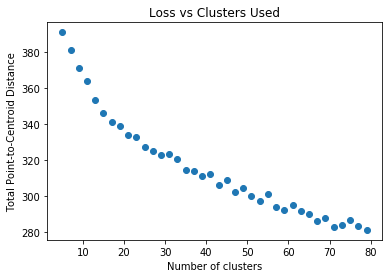

In [40]:
# Plot loss vs number of clusters
def lossVsClusters(kmin, kmax, kstep, choc_data):
  kmax += 1  # include kmax-th cluster in range
  kRange = range(kmin, kmax, kstep)
  loss = np.zeros(len(kRange))
  lossCtr = 0
  for kk in kRange:
    [choc_data, centroids] = kmeans(choc_data, kk, feature_cols, 0)
    loss[lossCtr] = np.sum(choc_data['pt2centroid'])
    lossCtr += 1
  plt.scatter(kRange, loss)
  plt.title('Loss vs Clusters Used')
  plt.xlabel('Number of clusters')
  plt.ylabel('Total Point-to-Centroid Distance')


kmin = 5  # @param
kmax = 80  # @param
kstep = 2  # @param
lossVsClusters(kmin, kmax, kstep, choc_data)

In [41]:
#@title
# Calculate distances between "A" point and "B" centroids to return
# axb array where a_i,b_j distance is at (i,j) position
A = np.array([[1, 2, 3],\
              [3, 1, 2],\
              [0, 0, 0]])
A = A / np.max(A)
B = np.array([[4, 5, 6],\
              [6, 6, 6]])
B = B / np.max(B)
numPoints = A.shape[0]
numCentroids = B.shape[0]
pointNorms = np.reshape(nla.norm(A, axis=1)**2.0, [numPoints, 1])
centroidNorms = np.reshape(nla.norm(B, axis=1)**2.0, (1, numCentroids))
print """Distance matrix of size 'p' by 'c' where Distance between 
point 'p' and centroid 'c' is at (p,c)."""
print pointNorms + centroidNorms - 2.0 * np.dot(A, np.transpose(B))

SyntaxError: invalid syntax (<ipython-input-41-c1c2a3a2f56b>, line 16)